In [24]:
import numpy as np
import corner
import h5py
import json

import matplotlib.pyplot as plt

import pycbc
from matplotlib.lines import Line2D
from scipy.stats import gaussian_kde, norm, cauchy

from pycbc.conversions import mass1_from_mchirp_q, mass2_from_mchirp_q, f_schwarzchild_isco

from pycbc.types.frequencyseries import FrequencySeries
from pycbc.conversions import mass1_from_mchirp_eta, mass2_from_mchirp_eta
from plotting_utils import pos_samples, title_formats, plot_corner, ecdf


### $k\neq 0 $ corner plot

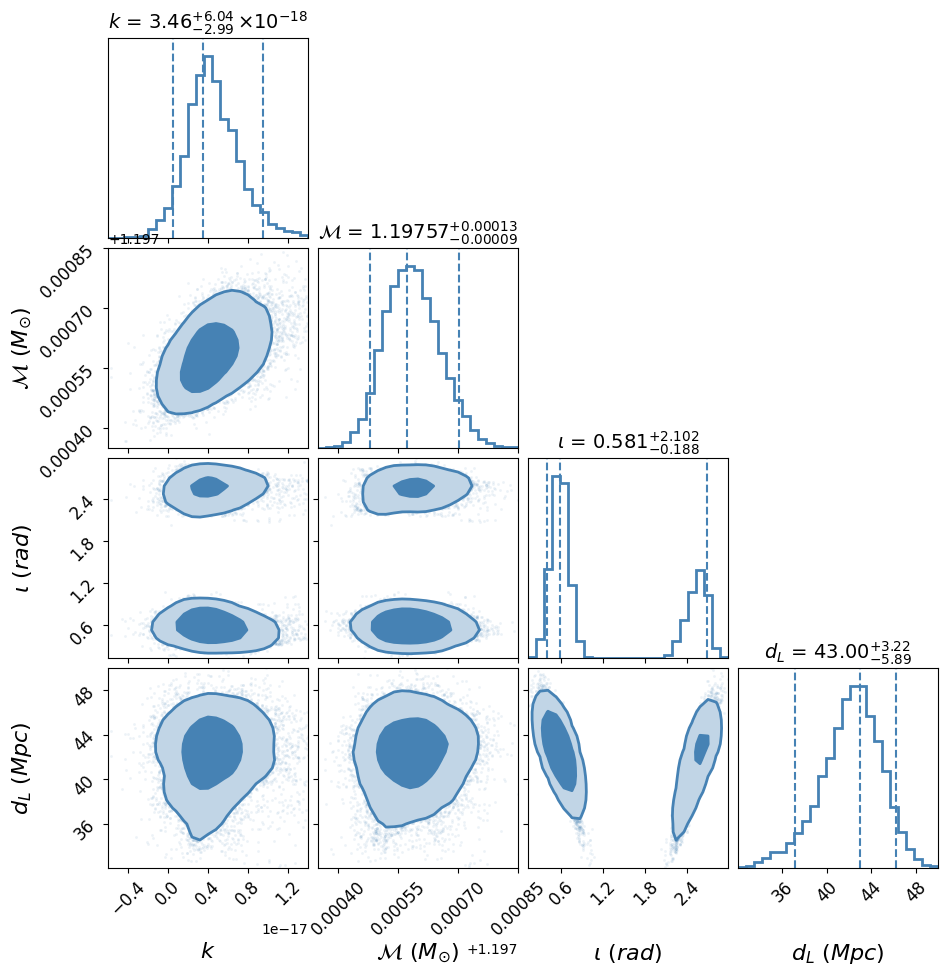

In [27]:
labels_k = [r'$k$', r'$\mathcal{M} \,\, (M_{\odot})$', r'$\iota \,\,(rad)$', r'$d_L \, \,(Mpc)$']
titles_k = [r'$k$', r'$\mathcal{M}$', r'$\iota$', r'$d_L$']

fmt_arr_k = ['.2f', '.5f', '.3f', '.2f']

params_k = ['k', 'mchirp', 'iota', 'distance']
samps_k = pos_samples('samples_data_k_1.0_fISCO_seedPE_0.hdf5', params_k)

bins = 25
measure = 'map'
tlabels_k = title_formats(samps_k, labels_k, titles_k, fmt_arr_k, bins, measure=measure)
range_vals = [(-0.6e-17, 1.4e-17), (1.19735, 1.19785), \
              (samps_k[:,2].min(), samps_k[:,2].max()), (32, 50)]

levels = [0.5, 0.9]
kwargs = dict(labels=labels_k, show_titles=True, bins=bins, quantiles=[0.05, 0.5, 0.95], levels=levels, titles=titles_k, title_hist=tlabels_k, color='steelblue', \
                                tlabels=tlabels_k, labelpad=0.07, label_kwargs=dict(fontsize=16), \
                                contour_kwargs=dict(linewidths=2), hist_kwargs=dict(lw=2, density=True), \
                                title_kwargs=dict(fontsize=14), plot_density=dict(plot_density=True),\
                                pad_inches=0.05, range=range_vals, plot_datapoints=True,  fill_contours=dict(fill_contours=False))

filename = 'corner_plot.png'
plot_corner(samps_k, filename=filename, save=False, dpi=200, **kwargs);

### Savage Dickey's Bayes' factor

In [26]:
p_k_0 = cauchy.pdf(0, loc=0, scale=3.5e-16)
# k_l, k_med, k_h = np.quantile(samps_k[:,0], [0.05, 0.50, 0.95])
kernel = gaussian_kde(samps_k[:,0])
print('Area under the curve: {}'.format(kernel.integrate_box_1d(samps_k[:,0].min(), samps_k[:,0].max())))
print('p(k=0|d) = %.2e'%kernel(0)[0])
print('Log Bayes factor = p(k=0|d)/p(k=0) = %.2f'%(np.log10(kernel(0)[0]/p_k_0)))

Area under the curve: 0.9998781049888518
p(k=0|d) = 3.00e+16
Log Bayes factor = p(k=0|d)/p(k=0) = 1.52
